In [90]:
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [135]:
df=pd.read_csv("Eva Report 2022-01-03.csv")
df.head()

,rec_id,address,age,agree_terms,district,first_name,last_name,gender,how_did_you_find,income_range,...,occupation,points,using_time,code_id,education,method,facebook_token,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,312,NaN,NaN,agree,Kandy,Vishu,Ekanayake,NaN,TV,NaN,...,NaN,1,1 Year - 2 Years,3555728,NaN,SMS,NaN,NaN,NaN,NaN
1,313,"No 272,Main street,Anuradhapura",NaN,agree,Anuradhapura,Nishanthi,Somatilake,NaN,TV,NaN,...,NaN,1,More than 10 Years,1464889,NaN,SMS,NaN,NaN,NaN,NaN
2,315,"No 2/4, Deniya Road Suwarapola, Piliyandala",NaN,agree,Colombo,Chathurika,Sirisena,NaN,Website,NaN,...,NaN,1,More than 10 Years,4181545,NaN,SMS,NaN,NaN,NaN,NaN
3,316,"සුරට්ටු ගෙදර, ගුරුකන්ද, කතළුව, අහන්ගම",29,agree,ගාල්ල,කාරියවසම් සින්ගප්පුලි තන්තිරිගේ,නිලුකා සුරන්ගි,ස්ත්‍රී,TV,"21,000-30,000",...,ඇගළුම් සේවිකා,20,අවු:10ට වැඩි,3395856,සාමාන්‍ය පෙළ දක්වා,SMS,EAAHZB0hhYlTYBAJoCsIlsEoq0WytXpnQqO1ZBbO8ZCJb8...,NaN,NaN,NaN
4,317,"4/2, Wathumulla , Udugampola .",41,agree,Gampaha,Madhavi,Jayangani,Female,TV,"21,000-30,000",...,House Wife,6,More than 10 Years,908037,Diploma,SMS,NaN,NaN,NaN,NaN


In [136]:
df.drop(['rec_id','address','agree_terms','gender','code_id','first_name','last_name','Unnamed: 18','Unnamed: 19','Unnamed: 20'], axis=1, inplace=True)
df.head(5)

,age,district,how_did_you_find,income_range,no_of_children,occupation,points,using_time,education,method,facebook_token
0,NaN,Kandy,TV,NaN,NaN,NaN,1,1 Year - 2 Years,NaN,SMS,NaN
1,NaN,Anuradhapura,TV,NaN,NaN,NaN,1,More than 10 Years,NaN,SMS,NaN
2,NaN,Colombo,Website,NaN,NaN,NaN,1,More than 10 Years,NaN,SMS,NaN
3,29,ගාල්ල,TV,"21,000-30,000",0,ඇගළුම් සේවිකා,20,අවු:10ට වැඩි,සාමාන්‍ය පෙළ දක්වා,SMS,EAAHZB0hhYlTYBAJoCsIlsEoq0WytXpnQqO1ZBbO8ZCJb8...
4,41,Gampaha,TV,"21,000-30,000",3,House Wife,6,More than 10 Years,Diploma,SMS,NaN


In [137]:
df.isnull().sum()

age                  5425
district                0
how_did_you_find        1
income_range         7355
no_of_children       7411
occupation           5453
points                  1
using_time              1
education            7314
method                  1
facebook_token      23397
dtype: int64

In [138]:
ab =(df['facebook_token'].notnull()).astype('int')
a_dict=[] #assigning the iterations to a dictionary
for c in ab:
    a_dict.append(c)

In [139]:
df['Token']=a_dict
df.drop(['facebook_token'], axis=1,inplace=True)
df

,age,district,how_did_you_find,income_range,no_of_children,occupation,points,using_time,education,method,Token
0,NaN,Kandy,TV,NaN,NaN,NaN,1,1 Year - 2 Years,NaN,SMS,0
1,NaN,Anuradhapura,TV,NaN,NaN,NaN,1,More than 10 Years,NaN,SMS,0
2,NaN,Colombo,Website,NaN,NaN,NaN,1,More than 10 Years,NaN,SMS,0
3,29,ගාල්ල,TV,"21,000-30,000",0,ඇගළුම් සේවිකා,20,අවු:10ට වැඩි,සාමාන්‍ය පෙළ දක්වා,SMS,1
4,41,Gampaha,TV,"21,000-30,000",3,House Wife,6,More than 10 Years,Diploma,SMS,0
...,...,...,...,...,...,...,...,...,...,...,...
32183,44,Colombo,Radio,"Above 70,000",2,Dean,6,More than 10 Years,PHD,QR,0
32184,26,Colombo,Facebook,"51,000-70,000",0,Assistant Manager,6,More than 10 Years,Diploma,QR,0
32185,NaN,Kegalle,TV,NaN,NaN,NaN,1,5 Years - 10 Years,NaN,QR,0
32186,NaN,Kegalle,TV,NaN,NaN,NaN,1,5 Years - 10 Years,NaN,QR,0


In [140]:
df['points'].replace("1","2nd Screen",inplace=True)
df['points'].replace("6","3rd Screen",inplace=True)
df['points'].replace("16","FB log",inplace=True)
df['points'].replace("18","FB Share",inplace=True)
df['points'].replace("20","FB like",inplace=True)
df.rename(columns={'points': 'until'}, inplace=True)
df

,age,district,how_did_you_find,income_range,no_of_children,occupation,until,using_time,education,method,Token
0,NaN,Kandy,TV,NaN,NaN,NaN,2nd Screen,1 Year - 2 Years,NaN,SMS,0
1,NaN,Anuradhapura,TV,NaN,NaN,NaN,2nd Screen,More than 10 Years,NaN,SMS,0
2,NaN,Colombo,Website,NaN,NaN,NaN,2nd Screen,More than 10 Years,NaN,SMS,0
3,29,ගාල්ල,TV,"21,000-30,000",0,ඇගළුම් සේවිකා,FB like,අවු:10ට වැඩි,සාමාන්‍ය පෙළ දක්වා,SMS,1
4,41,Gampaha,TV,"21,000-30,000",3,House Wife,3rd Screen,More than 10 Years,Diploma,SMS,0
...,...,...,...,...,...,...,...,...,...,...,...
32183,44,Colombo,Radio,"Above 70,000",2,Dean,3rd Screen,More than 10 Years,PHD,QR,0
32184,26,Colombo,Facebook,"51,000-70,000",0,Assistant Manager,3rd Screen,More than 10 Years,Diploma,QR,0
32185,NaN,Kegalle,TV,NaN,NaN,NaN,2nd Screen,5 Years - 10 Years,NaN,QR,0
32186,NaN,Kegalle,TV,NaN,NaN,NaN,2nd Screen,5 Years - 10 Years,NaN,QR,0


In [141]:
df['until'].value_counts()

3rd Screen              18060
FB like                  5625
2nd Screen               5425
FB log                   1752
FB Share                 1319
2                           1
ශිෂ්‍ය                      1
Project Coordinator         1
සුදුසු නොවේ                 1
රැකියාවක් නැත               1
Project coordinator         1
Name: until, dtype: int64

In [142]:
df.drop(['Token'], axis=1,inplace=True)
df

,age,district,how_did_you_find,income_range,no_of_children,occupation,until,using_time,education,method
0,NaN,Kandy,TV,NaN,NaN,NaN,2nd Screen,1 Year - 2 Years,NaN,SMS
1,NaN,Anuradhapura,TV,NaN,NaN,NaN,2nd Screen,More than 10 Years,NaN,SMS
2,NaN,Colombo,Website,NaN,NaN,NaN,2nd Screen,More than 10 Years,NaN,SMS
3,29,ගාල්ල,TV,"21,000-30,000",0,ඇගළුම් සේවිකා,FB like,අවු:10ට වැඩි,සාමාන්‍ය පෙළ දක්වා,SMS
4,41,Gampaha,TV,"21,000-30,000",3,House Wife,3rd Screen,More than 10 Years,Diploma,SMS
...,...,...,...,...,...,...,...,...,...,...
32183,44,Colombo,Radio,"Above 70,000",2,Dean,3rd Screen,More than 10 Years,PHD,QR
32184,26,Colombo,Facebook,"51,000-70,000",0,Assistant Manager,3rd Screen,More than 10 Years,Diploma,QR
32185,NaN,Kegalle,TV,NaN,NaN,NaN,2nd Screen,5 Years - 10 Years,NaN,QR
32186,NaN,Kegalle,TV,NaN,NaN,NaN,2nd Screen,5 Years - 10 Years,NaN,QR


In [143]:
df.isnull().sum()

age                 5425
district               0
how_did_you_find       1
income_range        7355
no_of_children      7411
occupation          5453
until                  1
using_time             1
education           7314
method                 1
dtype: int64

In [144]:
df = df[df.isnull().sum(axis=1) <= 2]
df.isnull().sum()

age                    0
district               0
how_did_you_find       0
income_range        1386
no_of_children      1442
occupation            27
until                  0
using_time             0
education           1345
method                 0
dtype: int64

In [145]:
df

,age,district,how_did_you_find,income_range,no_of_children,occupation,until,using_time,education,method
3,29,ගාල්ල,TV,"21,000-30,000",0,ඇගළුම් සේවිකා,FB like,අවු:10ට වැඩි,සාමාන්‍ය පෙළ දක්වා,SMS
4,41,Gampaha,TV,"21,000-30,000",3,House Wife,3rd Screen,More than 10 Years,Diploma,SMS
6,42,ගම්පහ,TV,සුදුසු නොවේ,2,ගෘහනිය,3rd Screen,අවු:10ට වැඩි,උසස් පෙළ දක්වා,SMS
7,25,ගම්පහ,TV,"21,000-30,000",0,Translator,3rd Screen,අවු:10ට වැඩි,ඩිප්ලෝමාධාරී,SMS
8,23,Jaffna,Website,Not eligible,0,Student,FB Share,5 Years - 10 Years,Diploma,SMS
...,...,...,...,...,...,...,...,...,...,...
32181,24,Colombo,Friend,"31,000-40,000",0,Nursing student,FB like,5 Years - 10 Years,Diploma,SMS
32182,29,Kalutara,Friend,Not eligible,2,Housewife,3rd Screen,Less than 6 Months,Diploma,QR
32183,44,Colombo,Radio,"Above 70,000",2,Dean,3rd Screen,More than 10 Years,PHD,QR
32184,26,Colombo,Facebook,"51,000-70,000",0,Assistant Manager,3rd Screen,More than 10 Years,Diploma,QR


In [146]:
df.head(7)

,age,district,how_did_you_find,income_range,no_of_children,occupation,until,using_time,education,method
3,29,ගාල්ල,TV,"21,000-30,000",0,ඇගළුම් සේවිකා,FB like,අවු:10ට වැඩි,සාමාන්‍ය පෙළ දක්වා,SMS
4,41,Gampaha,TV,"21,000-30,000",3,House Wife,3rd Screen,More than 10 Years,Diploma,SMS
6,42,ගම්පහ,TV,සුදුසු නොවේ,2,ගෘහනිය,3rd Screen,අවු:10ට වැඩි,උසස් පෙළ දක්වා,SMS
7,25,ගම්පහ,TV,"21,000-30,000",0,Translator,3rd Screen,අවු:10ට වැඩි,ඩිප්ලෝමාධාරී,SMS
8,23,Jaffna,Website,Not eligible,0,Student,FB Share,5 Years - 10 Years,Diploma,SMS
9,29,Colombo,Friend,"Above 70,000",0,Consultant,3rd Screen,More than 10 Years,Degree,SMS
10,25,කළුතර,වෙබ් අඩවිය,සුදුසු නොවේ,1,No,3rd Screen,අවු:10ට වැඩි,උසස් පෙළ දක්වා,SMS


In [147]:
df['district'].value_counts()

Colombo          3690
Gampaha          2286
ගම්පහ            2027
කොළඹ             1583
Kandy            1177
                 ... 
මූලතිව්             1
පානදුර "            1
மொணராகலை            1
43                  1
அம்பாந்தோட்டை       1
Name: district, Length: 74, dtype: int64

In [148]:
df['district'].replace("ගාල්ල","Galle",inplace=True)
df['district'].replace("ගම්පහ","Gampaha",inplace=True)
df['district'].replace("කොළඹ","Colombo",inplace=True)
df['district'].replace("මහනුවර","Kandy",inplace=True)
df['district'].replace("කළුතර","Kalutara",inplace=True)
df['district'].replace("කුරුණෑගල","Kurunegala",inplace=True)
df['district'].replace("කෑගල්ල","Kegalle",inplace=True)
df['district'].replace("අනුරාධපුරය","Anuradhapura",inplace=True)
df['district'].replace("රත්නපුර","Ratnapura",inplace=True)
df['district'].replace("මාතර","Matara",inplace=True)
df['district'].replace("හම්බන්තොට","Hambantota",inplace=True)
df['district'].replace("පුත්තලම","Puttalam",inplace=True)
df['district'].replace("අම්පාර","Ampara",inplace=True)
df['district'].replace("පොළොන්නරුව","Polonnaruwa",inplace=True)
df['district'].replace("බදුල්ල","Badulla",inplace=True)
df['district'].replace("මාතලේ","Matale",inplace=True)
df['district'].replace("මොනරාගල","Moneragala",inplace=True)
df['district'].replace("නුවර එළිය","Nuwara Eliya",inplace=True)
df['district'].replace("மாத்தளை","Matale",inplace=True)
df['district'].replace("கம்பஹா","Gampaha",inplace=True)
df['district'].replace("பொலன்னறுவ","Polonnaruwa",inplace=True)
df['district'].replace("நுவரெலியா","Nuwara Eliya",inplace=True)
df['district'].replace("திருகோணமலை","Trincomalee",inplace=True)
df['district'].replace("கண்டி","Kandy",inplace=True)
df['district'].replace("மட்டக்களப்பு","Batticaloa",inplace=True)
df['district'].replace("அம்பாறை","Ampara",inplace=True)
df['district'].replace("களுத்துறை","Kalutara",inplace=True)
df['district'].replace("Monaragala","Moneragala",inplace=True)
df['district'].replace("புத்தளம்","Puttalam",inplace=True)
df['district'].replace("கொழும்பு","Colombo",inplace=True)
df['district'].replace("குருணாகல்","Kurunegala",inplace=True)
df['district'].replace("யாழ்ப்பாணம்","Jaffna",inplace=True)
df['district'].replace("இரத்தினபுரி","Ratnapura",inplace=True)
df['district'].replace("முல்லைத்தீவு","Mullaitivu",inplace=True)
df['district'].replace("பதுளை","Badulla",inplace=True)
df['district'].replace("கிளிநொச்சி","Kilinochchi",inplace=True)
df['district'].replace("වවුනියාව","Vavuniya",inplace=True)
df['district'].replace("வவுனியா","Vavuniya",inplace=True)
df['district'].replace("கேகாலை","Kegalle",inplace=True)
df['district'].replace("ත්‍රිකුණාමළය","Vavuniya",inplace=True)
df['district'].replace("அனுராதபுரம்","Anuradhapura",inplace=True)
df['district'].replace("மன்னார்","Mannar",inplace=True)
df['district'].replace("அம்பாந்தோட்டை","Hambantota",inplace=True)
df['district'].replace("මූලතිව්","Mullaitivu",inplace=True)
df['district'].replace('පානදුර "',"Colombo",inplace=True)
df['district'].replace("மாத்தறை","Matara",inplace=True)
df['district'].replace("மொணராகலை","Moneragala",inplace=True)
# df.drop(index=df[df['district'] == ',NULL,agree,අනුරාධපුරය,Wasana,Dissanayaka,NULL,Instagram,NULL,NULL,NULL,1,අවු:10ට වැඩි"'].index, inplace=True)
df

C:\Users\user\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,age,district,how_did_you_find,income_range,no_of_children,occupation,until,using_time,education,method
3,29,Galle,TV,"21,000-30,000",0,ඇගළුම් සේවිකා,FB like,අවු:10ට වැඩි,සාමාන්‍ය පෙළ දක්වා,SMS
4,41,Gampaha,TV,"21,000-30,000",3,House Wife,3rd Screen,More than 10 Years,Diploma,SMS
6,42,Gampaha,TV,සුදුසු නොවේ,2,ගෘහනිය,3rd Screen,අවු:10ට වැඩි,උසස් පෙළ දක්වා,SMS
7,25,Gampaha,TV,"21,000-30,000",0,Translator,3rd Screen,අවු:10ට වැඩි,ඩිප්ලෝමාධාරී,SMS
8,23,Jaffna,Website,Not eligible,0,Student,FB Share,5 Years - 10 Years,Diploma,SMS
...,...,...,...,...,...,...,...,...,...,...
32181,24,Colombo,Friend,"31,000-40,000",0,Nursing student,FB like,5 Years - 10 Years,Diploma,SMS
32182,29,Kalutara,Friend,Not eligible,2,Housewife,3rd Screen,Less than 6 Months,Diploma,QR
32183,44,Colombo,Radio,"Above 70,000",2,Dean,3rd Screen,More than 10 Years,PHD,QR
32184,26,Colombo,Facebook,"51,000-70,000",0,Assistant Manager,3rd Screen,More than 10 Years,Diploma,QR


In [149]:
df['district'].value_counts()

Colombo         5356
Gampaha         4346
Kandy           2172
Kurunegala      1998
Kalutara        1941
Galle           1410
Ratnapura       1038
Kegalle          916
Matara           881
Anuradhapura     872
Puttalam         786
Badulla          694
Hambantota       627
Matale           538
Nuwara Eliya     437
Ampara           400
Jaffna           370
Batticaloa       329
Moneragala       324
Polonnaruwa      228
Vavuniya         201
Trincomalee      191
Kilinochchi       61
Mannar            50
Mullaitivu        43
காலி               5
agree              4
43                 1
Name: district, dtype: int64

In [150]:
df = df.drop(df.index[df['district'] == '43'])
df = df.drop(df.index[df['district'] == 'agree'])
df = df.drop(df.index[df['district'] == 'காலி'])

In [151]:
df['using_time'].value_counts()

More than 10 Years          9359
අවු:10ට වැඩි                8587
5 Years - 10 Years          2874
අවු:5 සිට අවු: 10 දක්වා     2208
2 Years - 5 Years            786
10 ஆண்டுகளுக்கும் மேலாக      767
අවු:2 සිට අවු: 05 දක්වා      759
5-10 ஆண்டுகள்                319
1 Year - 2 Years             132
2-5 ஆண்டுகள்                 129
මාස 6 සිට අවු:01 දක්වා        94
 6 Months - 1 Year            73
Less than 6 Months            46
මාස 6කට අඩු                   41
1- 2 ஆண்டுகள்                 21
6 மாதங்கள் - 1 வருடம்          7
6 மாதங்களுக்கும் குறைவாக       6
0                              1
Name: using_time, dtype: int64

In [152]:
df['using_time'].replace("අවු:10ට වැඩි","More than 10 Years",inplace=True)
df['using_time'].replace("10 ஆண்டுகளுக்கும் மேலாக","More than 10 Years",inplace=True)
df['using_time'].replace("අවු:5 සිට අවු: 10 දක්වා","5 Years - 10 Years",inplace=True)
df['using_time'].replace("5-10 ஆண்டுகள்","5 Years - 10 Years",inplace=True)
df['using_time'].replace("අවු:2 සිට අවු: 05 දක්වා","2 Years - 5 Years",inplace=True)
df['using_time'].replace("2-5 ஆண்டுகள்","2 Years - 5 Years",inplace=True)
df['using_time'].replace("මාස 6කට අඩු","Less than 6 Months",inplace=True)
df['using_time'].replace("මාස 6 සිට අවු:01 දක්වා","6 Months - 1 Year",inplace=True)
df['using_time'].replace(" 6 Months - 1 Year",inplace=True)
df['using_time'].replace("1- 2 ஆண்டுகள்","1 Year - 2 Years",inplace=True)
df['using_time'].replace("6 மாதங்கள் - 1 வருடம்","6 Months - 1 Year",inplace=True)
df['using_time'].replace("6 மாதங்களுக்கும் குறைவாக","Less than 6 Months",inplace=True)

In [153]:
df['using_time'].value_counts()

More than 10 Years    18761
5 Years - 10 Years     5423
2 Years - 5 Years      1677
1 Year - 2 Years        153
6 Months - 1 Year       101
Less than 6 Months       93
0                         1
Name: using_time, dtype: int64

In [154]:
df = df.drop(df.index[df['using_time'] == '0'])

In [155]:
df['education'].value_counts()

උසස් පෙළ දක්වා                           5607
A/Level                                  4210
Degree                                   3855
Diploma                                  2754
සාමාන්‍ය පෙළ දක්වා                       2256
උපාධිධාරී                                1467
ඩිප්ලෝමාධාරී                             1445
O/Level                                  1188
Masters                                   572
 உ/த                                      489
சா/த                                      343
பட்டம்                                    159
டிப்ளோமா                                  119
Primary education (1-5)                   118
ප්‍රාථමික අධ්‍යාපනය (1 සිට 5 ශ්‍රේණි)      96
ශාස්ත්‍රපති                                79
ஆரம்பக் கல்வி (1-5)                        65
PHD                                        32
ආචාර්ය උපාධිධාරී                            6
MBA                                         3
Name: education, dtype: int64

In [156]:
df['education'].replace("උසස් පෙළ දක්වා ","A/Level",inplace=True)
df['education'].replace(" உ/த","A/Level",inplace=True)
df['education'].replace("සාමාන්‍ය පෙළ දක්වා ","O/Level",inplace=True)
df['education'].replace("சா/த","O/Level",inplace=True)
df['education'].replace("උපාධිධාරී ","Degree",inplace=True)
df['education'].replace("ඩිප්ලෝමාධාරී ","Diploma",inplace=True)
df['education'].replace("பட்டம்","Degree",inplace=True)
df['education'].replace("டிப்ளோமா ","Diploma",inplace=True)
df['education'].replace("ශාස්ත්‍රපති","Masters",inplace=True)
df['education'].replace("ප්‍රාථමික අධ්‍යාපනය (1 සිට 5 ශ්‍රේණි)","Primary education (1-5) ",inplace=True)
df['education'].replace("ஆரம்பக் கல்வி (1-5)","Primary education (1-5) ",inplace=True)
df['education'].replace("ආචාර්ය උපාධිධාරී ","PHD",inplace=True)
df['education'].replace("MBA ","Masters",inplace=True)
df['education'].value_counts()

A/Level                     10306
Degree                       5481
Diploma                      4318
O/Level                      3787
Masters                       654
Primary education (1-5)       279
PHD                            38
Name: education, dtype: int64

In [157]:
df = df.drop(df.index[df['education'] == '18'])
df['education'].value_counts()

A/Level                     10306
Degree                       5481
Diploma                      4318
O/Level                      3787
Masters                       654
Primary education (1-5)       279
PHD                            38
Name: education, dtype: int64

In [158]:
df['age'].value_counts()

25    1343
24    1224
26    1215
28    1187
27    1185
      ... 
66       1
79       1
87       1
0        1
9        1
Name: age, Length: 73, dtype: int64

In [159]:
df['how_did_you_find'].value_counts()

TV              16760
Facebook         2856
Friend           2061
මිතුරා            968
Website           887
YouTube           493
වෙබ් අඩවිය        461
Instagram         422
நண்பர்            295
පුවත්පත           229
Newspaper         221
Radio             169
இணையதளம்          169
ගුවන් විදුලි      109
செய்தித்தாள்       57
வானொலி             51
Name: how_did_you_find, dtype: int64

In [160]:
df['how_did_you_find'].replace("මිතුරා","Friend",inplace=True)
df['how_did_you_find'].replace("වෙබ් අඩවිය","Website",inplace=True)
df['how_did_you_find'].replace("இணையதளம்","Website",inplace=True)
df['how_did_you_find'].replace("පුවත්පත","Newspaper",inplace=True)
df['how_did_you_find'].replace("நண்பர்","Friend",inplace=True)
df['how_did_you_find'].replace("வானொலி","Radio",inplace=True)
df['how_did_you_find'].replace("செய்தித்தாள்","Newspaper",inplace=True)
df['how_did_you_find'].replace("ගුවන් විදුලි","Radio",inplace=True)
df['how_did_you_find'].value_counts()

TV           16760
Friend        3324
Facebook      2856
Website       1517
Newspaper      507
YouTube        493
Instagram      422
Radio          329
Name: how_did_you_find, dtype: int64

In [161]:
# df = df.drop(df.index[df['district'] == '30'])
# df = df.drop(df.index[df['district'] == '21'])
# df
df['no_of_children'].replace("5+",5,inplace=True)
df['no_of_children'].value_counts()

0    12193
2     5451
1     4407
3     2186
4      429
5      100
Name: no_of_children, dtype: int64

In [162]:
df.dtypes

age                 object
district            object
how_did_you_find    object
income_range        object
no_of_children      object
occupation          object
until               object
using_time          object
education           object
method              object
dtype: object

In [163]:
 
df['no_of_children'] = pd.to_numeric(df['no_of_children'])
# df['no_of_children'].astype(int)
df.dtypes

age                  object
district             object
how_did_you_find     object
income_range         object
no_of_children      float64
occupation           object
until                object
using_time           object
education            object
method               object
dtype: object

In [164]:
df["no_of_children"] = df.groupby("age").transform(lambda x: x.fillna(x.mean()))
df.isnull().sum()

age                    0
district               0
how_did_you_find       0
income_range        1386
no_of_children         0
occupation            27
until                  0
using_time             0
education           1345
method                 0
dtype: int64

In [165]:
df['income_range'].value_counts()

Not eligible              5085
සුදුසු නොවේ               4832
21,000-30,000             3797
31,000-40,000             2963
20,000 ට අඩු              2106
Less than 20,000          1860
41,000-50,000             1556
51,000-70,000              848
Above 70,000               769
தகுதியற்ற                  538
20,000 இற்கும் குறைந்த     340
70,000 ට වැඩි              123
70,000 இற்கும் அதிகமான       5
Name: income_range, dtype: int64

In [166]:
df['income_range'].replace("සුදුසු නොවේ","Not eligible",inplace=True)
df['income_range'].replace("20,000 ට අඩු","Less than 20,000",inplace=True)
df['income_range'].replace("20,000 இற்கும் குறைந்த","Less than 20,000",inplace=True)
df['income_range'].replace("தகுதியற்ற","Not eligible",inplace=True)
df['income_range'].replace("70,000 ට වැඩි","Above 70,000",inplace=True)
df['income_range'].replace("70,000 இற்கும் அதிகமான","Above 70,000",inplace=True)
df['income_range'].value_counts()

Not eligible        10455
Less than 20,000     4306
21,000-30,000        3797
31,000-40,000        2963
41,000-50,000        1556
Above 70,000          897
51,000-70,000         848
Name: income_range, dtype: int64

In [167]:
def fast_mode(DF, key_cols, value_col):
    return (df.groupby(key_cols + [value_col]).size() 
              .to_frame('counts').reset_index() 
              .sort_values('counts', ascending=False) 
              .drop_duplicates(subset=key_cols)).drop(columns='counts')
df.loc[df.income_range.isnull(), 'income_range'] = df.education.map(fast_mode(df, ['education'], 'income_range').set_index('education').income_range)

In [168]:
df.isnull().sum()

age                    0
district               0
how_did_you_find       0
income_range         122
no_of_children         0
occupation            27
until                  0
using_time             0
education           1345
method                 0
dtype: int64

In [169]:
def fast_mode(df, key_cols, value_col):
    return (df.groupby(key_cols + [value_col]).size() 
              .to_frame('counts').reset_index() 
              .drop_duplicates(subset=key_cols)).drop(columns='counts')
df.loc[df.education.isnull(), 'education'] = df.income_range.map(fast_mode(df, ['income_range'], 'education').set_index('income_range').education)

In [170]:
def fast_mode(df, key_cols, value_col):
    return (df.groupby(key_cols + [value_col]).size() 
              .to_frame('counts').reset_index() 
              .drop_duplicates(subset=key_cols)).drop(columns='counts')
df.loc[df.income_range.isnull(), 'income_range'] = df.education.map(fast_mode(df, ['education'], 'income_range').set_index('education').income_range)

In [171]:
df.isnull().sum()

age                   0
district              0
how_did_you_find      0
income_range        122
no_of_children        0
occupation           27
until                 0
using_time            0
education           122
method                0
dtype: int64

In [172]:
df

,age,district,how_did_you_find,income_range,no_of_children,occupation,until,using_time,education,method
3,29,Galle,TV,"21,000-30,000",0.0,ඇගළුම් සේවිකා,FB like,More than 10 Years,O/Level,SMS
4,41,Gampaha,TV,"21,000-30,000",3.0,House Wife,3rd Screen,More than 10 Years,Diploma,SMS
6,42,Gampaha,TV,Not eligible,2.0,ගෘහනිය,3rd Screen,More than 10 Years,A/Level,SMS
7,25,Gampaha,TV,"21,000-30,000",0.0,Translator,3rd Screen,More than 10 Years,Diploma,SMS
8,23,Jaffna,Website,Not eligible,0.0,Student,FB Share,5 Years - 10 Years,Diploma,SMS
...,...,...,...,...,...,...,...,...,...,...
32181,24,Colombo,Friend,"31,000-40,000",0.0,Nursing student,FB like,5 Years - 10 Years,Diploma,SMS
32182,29,Kalutara,Friend,Not eligible,2.0,Housewife,3rd Screen,Less than 6 Months,Diploma,QR
32183,44,Colombo,Radio,"Above 70,000",2.0,Dean,3rd Screen,More than 10 Years,PHD,QR
32184,26,Colombo,Facebook,"51,000-70,000",0.0,Assistant Manager,3rd Screen,More than 10 Years,Diploma,QR


In [173]:
df.dropna(subset = ['income_range', 'education'],inplace = True)

In [174]:
df.isnull().sum()

age                  0
district             0
how_did_you_find     0
income_range         0
no_of_children       0
occupation          27
until                0
using_time           0
education            0
method               0
dtype: int64

In [177]:
df.no_of_children = df.no_of_children.round(0)

In [178]:
df['no_of_children'].value_counts()

0.0    13215
2.0     5572
1.0     4601
3.0     2174
4.0      427
5.0       97
Name: no_of_children, dtype: int64

In [179]:
df['no_of_children'] = df['no_of_children'].astype(np.int64)
df['age'] = df['age'].astype(np.int64)
df.dtypes

age                  int64
district            object
how_did_you_find    object
income_range        object
no_of_children       int64
occupation          object
until               object
using_time          object
education           object
method              object
dtype: object

<AxesSubplot:>

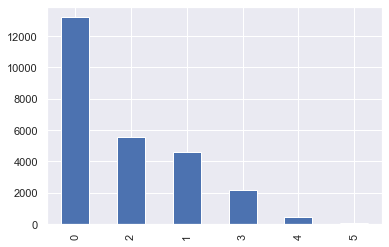

In [180]:
df['no_of_children'].value_counts().plot.bar()

<AxesSubplot:ylabel='Frequency'>

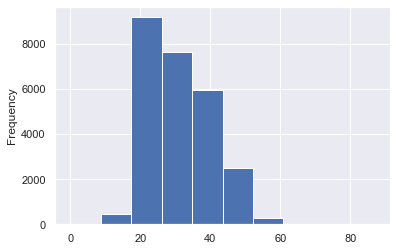

In [181]:
df['age'].plot.hist()

In [182]:
df

,age,district,how_did_you_find,income_range,no_of_children,occupation,until,using_time,education,method
3,29,Galle,TV,"21,000-30,000",0,ඇගළුම් සේවිකා,FB like,More than 10 Years,O/Level,SMS
4,41,Gampaha,TV,"21,000-30,000",3,House Wife,3rd Screen,More than 10 Years,Diploma,SMS
6,42,Gampaha,TV,Not eligible,2,ගෘහනිය,3rd Screen,More than 10 Years,A/Level,SMS
7,25,Gampaha,TV,"21,000-30,000",0,Translator,3rd Screen,More than 10 Years,Diploma,SMS
8,23,Jaffna,Website,Not eligible,0,Student,FB Share,5 Years - 10 Years,Diploma,SMS
...,...,...,...,...,...,...,...,...,...,...
32181,24,Colombo,Friend,"31,000-40,000",0,Nursing student,FB like,5 Years - 10 Years,Diploma,SMS
32182,29,Kalutara,Friend,Not eligible,2,Housewife,3rd Screen,Less than 6 Months,Diploma,QR
32183,44,Colombo,Radio,"Above 70,000",2,Dean,3rd Screen,More than 10 Years,PHD,QR
32184,26,Colombo,Facebook,"51,000-70,000",0,Assistant Manager,3rd Screen,More than 10 Years,Diploma,QR


In [183]:
df['until'].value_counts()

3rd Screen    17620
FB like        5566
FB log         1593
FB Share       1307
Name: until, dtype: int64

In [184]:
df['FB logged'] = df['until']
df['FB logged'].replace("3rd Screen","No",inplace=True)
df['FB logged'].replace("FB like","Yes",inplace=True)
df['FB logged'].replace("FB log","Yes",inplace=True)
df['FB logged'].replace("FB Share","Yes",inplace=True)
df.head(5)

,age,district,how_did_you_find,income_range,no_of_children,occupation,until,using_time,education,method,FB logged
3,29,Galle,TV,"21,000-30,000",0,ඇගළුම් සේවිකා,FB like,More than 10 Years,O/Level,SMS,Yes
4,41,Gampaha,TV,"21,000-30,000",3,House Wife,3rd Screen,More than 10 Years,Diploma,SMS,No
6,42,Gampaha,TV,Not eligible,2,ගෘහනිය,3rd Screen,More than 10 Years,A/Level,SMS,No
7,25,Gampaha,TV,"21,000-30,000",0,Translator,3rd Screen,More than 10 Years,Diploma,SMS,No
8,23,Jaffna,Website,Not eligible,0,Student,FB Share,5 Years - 10 Years,Diploma,SMS,Yes


In [185]:
df['FB logged'].value_counts()

No     17620
Yes     8466
Name: FB logged, dtype: int64

In [191]:
df.to_csv('cleaned3rd.csv', index=False)

In [186]:
17620/(17620+8466)*100 #No%

67.54581001303382

In [192]:
8466/(17620+8466)*100 #Yes %

32.454189986966185

In [193]:
df['method'].value_counts()

SMS    25046
QR      1040
Name: method, dtype: int64

In [194]:
(1040/(17620+8466))*100 #QR Code %

3.9868128498044926

In [195]:
(25046/(17620+8466))*100 #SMS %

96.0131871501955

In [196]:
(1582-60)/(4673) #SMS yes %

0.32570083458163923

In [197]:
67/(218) #QR Code yes %

0.3073394495412844

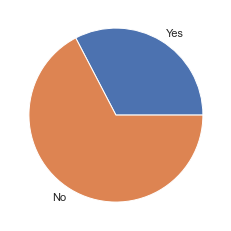

In [198]:
import matplotlib.pyplot as plt  #Overall
import numpy as np

y = np.array([1582, 3264])
mylabels = ["Yes", "No"]

plt.pie(y, labels = mylabels)
plt.show() 

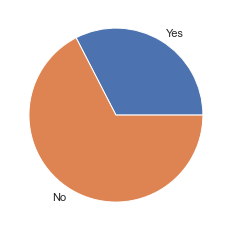

In [199]:
import matplotlib.pyplot as plt #SMS
import numpy as np

y = np.array([1522,4673-1522])
mylabels = ["Yes", "No"]

plt.pie(y, labels = mylabels)
plt.show() 

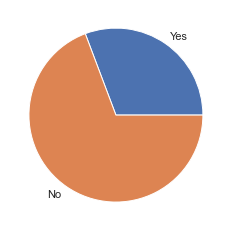

In [200]:
y = np.array([67, 218-67])
mylabels = ["Yes", "No"]

plt.pie(y, labels = mylabels)
plt.show() 

# 96.5% of the users have joined using SMS gateway while only 3.5% of them had joined through QR codes similar to previous weeks. 33% of the users who joined through SMS have logged into facebook, while only 31% of those who joined through QR codes have logged into facebook. A 35% FB logging rate was recorded last week, and weeks before.

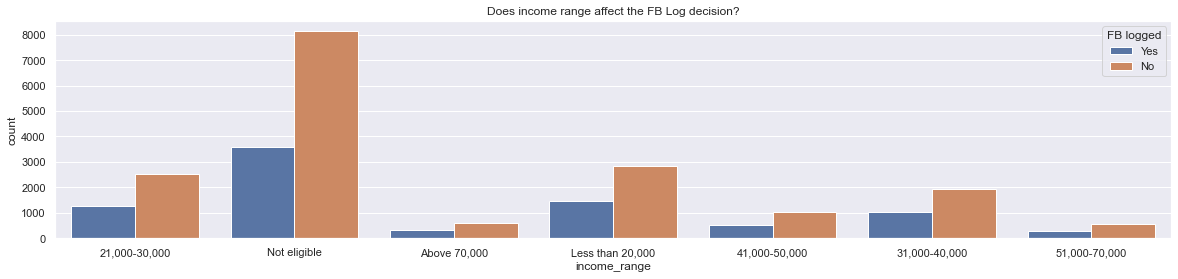

In [201]:
figure = plt.figure(figsize=(20,4))
plt.title("Does income range affect the FB Log decision?")
sns.countplot(x='income_range',hue='FB logged',data=df)
plt.show()

In [202]:
df['bin'] = pd.cut(df['age'], [15,20,25,30,35,40,45,50,55])

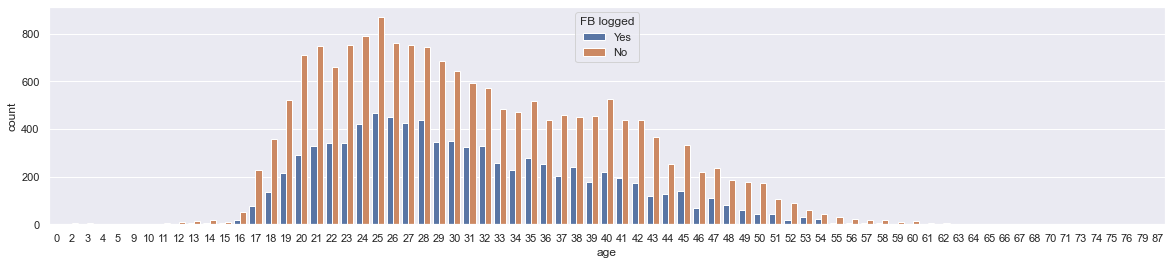

In [203]:
figure = plt.figure(figsize=(20,4))
sns.countplot(x='age',hue='FB logged',data=df)
plt.show()

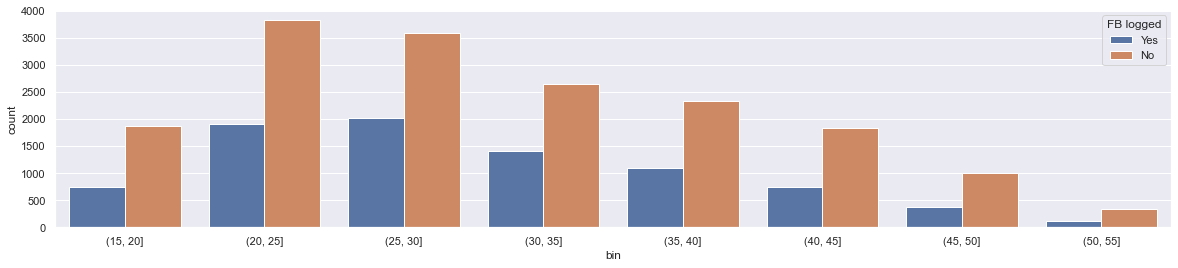

In [204]:
figure = plt.figure(figsize=(20,4))
sns.countplot(x='bin',hue='FB logged',data=df)
plt.show()

# Less proportion of users below 25 year and above 40 years of age seem to log into their facebook accounts. Moreover, a higher proportion of users in the age ranges of 30-35 seem to log into their FB. Highest proportion of users who logged in is observed in users of age 32 and 36.

In [202]:
# df['age'].plot(kind='barh',stat=True)

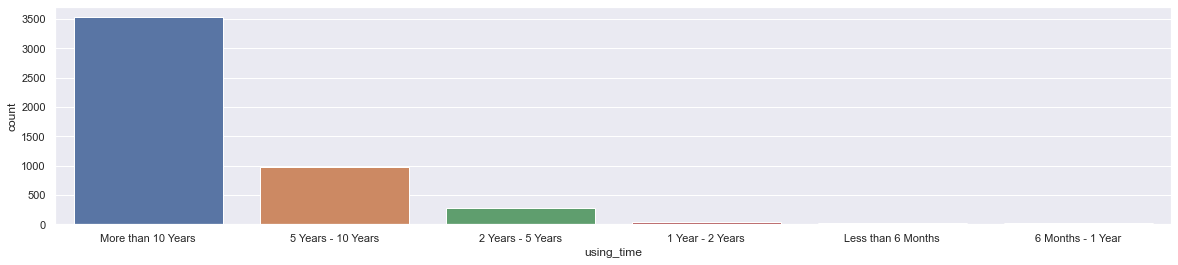

In [203]:
figure = plt.figure(figsize=(20,4))
sns.countplot(x='using_time',data=df)
plt.show()

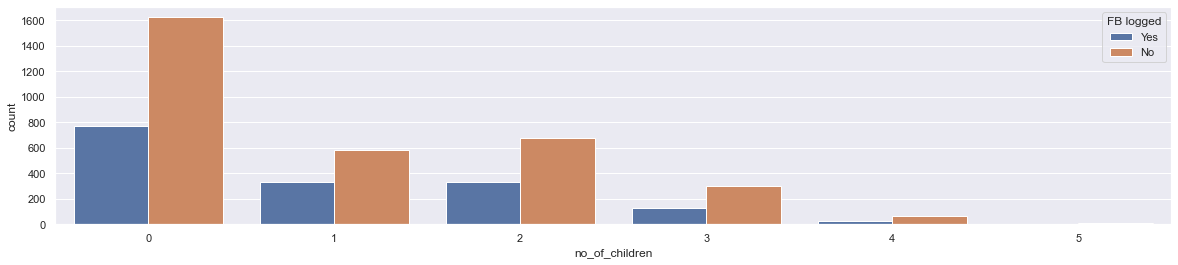

In [172]:
figure = plt.figure(figsize=(20,4))
sns.countplot(x='no_of_children',hue='FB logged',data=df)
plt.show()

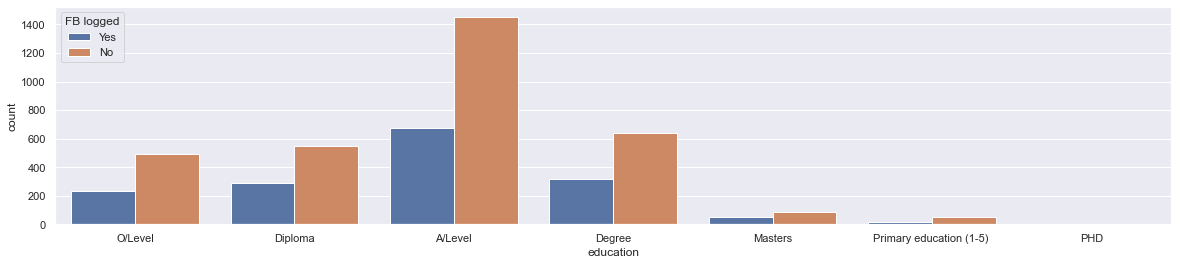

In [173]:
figure = plt.figure(figsize=(20,4))
sns.countplot(x='education',hue='FB logged',data=df)
plt.show()

# Users with less educational qualifications seem to proceeed to logged into Facebook more

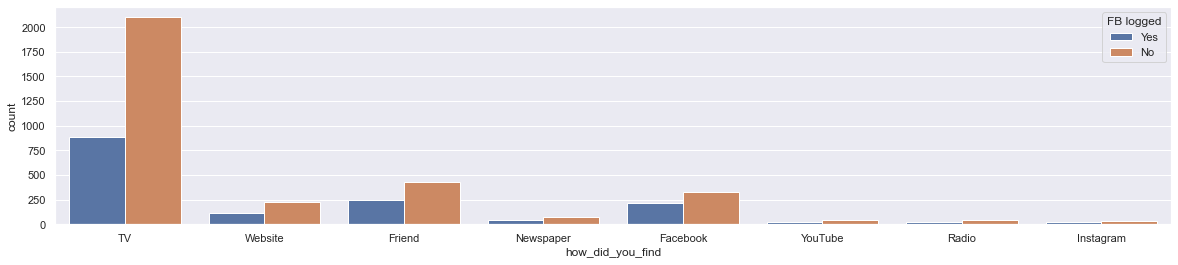

In [174]:
figure = plt.figure(figsize=(20,4))
sns.countplot(x='how_did_you_find',hue='FB logged',data=df)
plt.show()

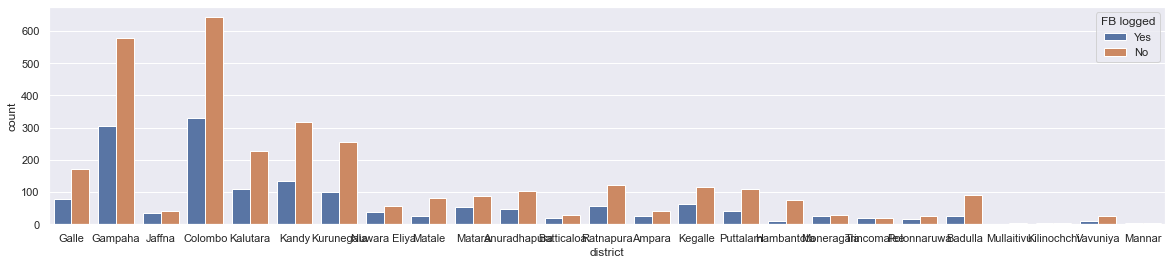

In [204]:
figure = plt.figure(figsize=(20,4))
sns.countplot(x='district',hue='FB logged',data=df)
plt.show()

# Comparatively the proportion of users who don't log in to their facebook is more in the western and southern provinces.

<AxesSubplot:xlabel='education', ylabel='count'>

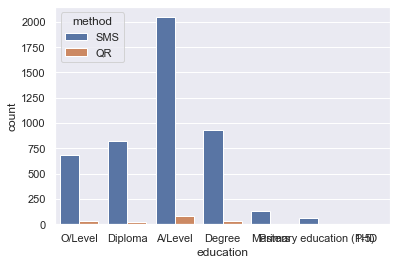

In [176]:
sns.countplot(x='education',hue='method',data=df)

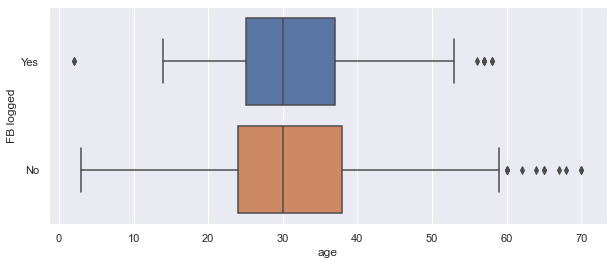

In [177]:
figure = plt.figure(figsize=(10,4))
sns.boxplot(x="age",y="FB logged",data=df)
plt.show()

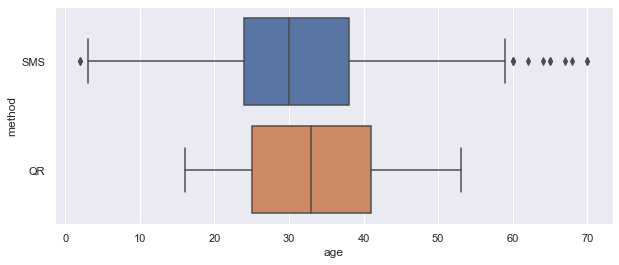

In [178]:
figure = plt.figure(figsize=(10,4))
sns.boxplot(x="age",y="method",data=df)
plt.show()

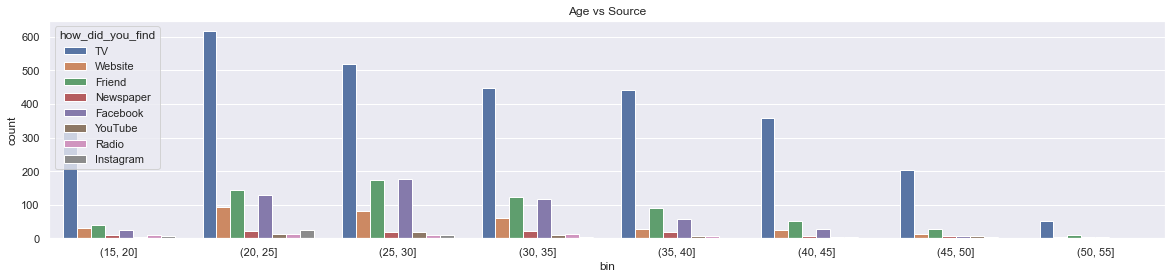

In [205]:
figure = plt.figure(figsize=(20,4))
plt.title("Age vs Source")
sns.countplot(x='bin',hue='how_did_you_find',data=df)
plt.show()

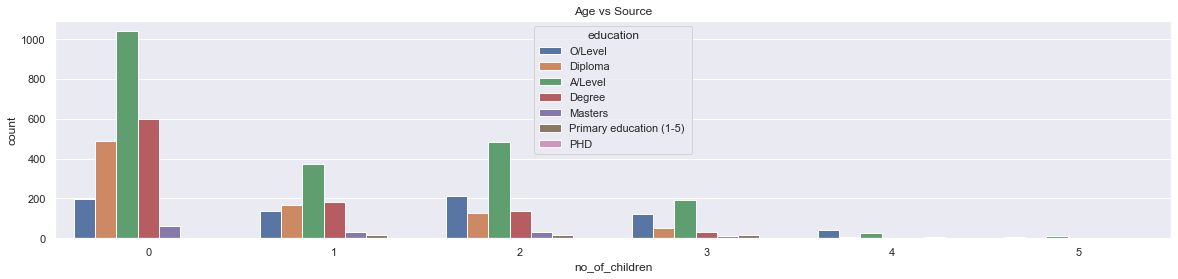

In [180]:
figure = plt.figure(figsize=(20,4))
plt.title("Age vs Source")
sns.countplot(x='no_of_children',hue='education',data=df)
plt.show()

In [181]:
a = pd.get_dummies(df, columns=["district", "how_did_you_find", "income_range","no_of_children","using_time","education","method","FB logged"], 
                   prefix=["district", "how_did_you_find", "income_range","no_of_children","using_time","education","method","FB logged"], drop_first=True)
a.head(5)

,age,occupation,until,bin,district_Anuradhapura,district_Badulla,district_Batticaloa,district_Colombo,district_Galle,district_Gampaha,...,using_time_Less than 6 Months,using_time_More than 10 Years,education_Degree,education_Diploma,education_Masters,education_O/Level,education_PHD,education_Primary education (1-5),method_SMS,FB logged_Yes
3,29,ඇගළුම් සේවිකා,FB like,"(25, 30]",0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,1
4,41,House Wife,3rd Screen,"(40, 45]",0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
5,42,ගෘහනිය,3rd Screen,"(40, 45]",0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
6,25,Translator,3rd Screen,"(20, 25]",0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
7,23,Student,FB Share,"(20, 25]",0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1


In [242]:
a.drop(['occupation','until'],axis=1,inplace=True)
a

,age,bin,district_Anuradhapura,district_Badulla,district_Batticaloa,district_Colombo,district_Galle,district_Gampaha,district_Hambantota,district_Jaffna,...,using_time_Less than 6 Months,using_time_More than 10 Years,education_Degree,education_Diploma,education_Masters,education_O/Level,education_PHD,education_Primary education (1-5),method_SMS,FB logged_Yes
3,29.0,"(25, 30]",0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,1
4,41.0,"(40, 45]",0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
5,42.0,"(40, 45]",0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
6,25.0,"(20, 25]",0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
7,23.0,"(20, 25]",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,34.0,"(30, 35]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
975,26.0,"(25, 30]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
976,31.0,"(30, 35]",0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
977,53.0,"(50, 55]",0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


In [243]:
X=a.drop("FB logged_Yes",axis=1).values
Y=a["FB logged_Yes"].values

In [244]:
from sklearn.linear_model import LinearRegression


In [245]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,test_size=0.2)
#Splitting the dataset into test and train sets

In [246]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix

def evaluation(Y_test,Y_pred):
    acc=accuracy_score(Y_test,Y_pred)
    rcl=recall_score(Y_test,Y_pred)
    f1=f1_score(Y_test,Y_pred)
    
    metric_dict={'accuracy': round(acc,3),
                 'recall': round(rcl,3),
                 'F1 score': round(f1,3),
               
              }
    return print(metric_dict)

In [247]:
from sklearn.linear_model import LogisticRegression
LR_clf=LogisticRegression(max_iter=2000)
LR_clf.fit(X_train,Y_train)
LR_Y_pred=LR_clf.predict(X_test)
LR_score=LR_clf.score(X_test,Y_test)
#print(LR_score)
evaluation(Y_test,LR_Y_pred)

TypeError: float() argument must be a string or a number, not 'pandas._libs.interval.Interval'

NameError: name 'LR_Y_pred' is not defined

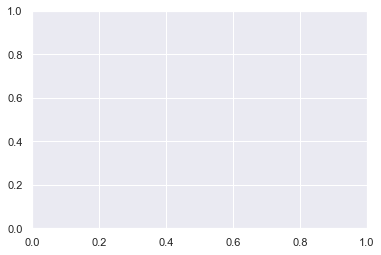

In [248]:
from sklearn.metrics import confusion_matrix

fig,ax=plt.subplots()
ax=sns.heatmap(confusion_matrix(Y_test,LR_Y_pred),annot=True,cbar=True);

In [ ]:
print(LR_clf.intercept_)
print(LR_clf.coef_)

In [ ]:
# import statsmodels.api as sm
# result = LR_clf.fit(method='bfgs')
# print(result.summary())
# logit_model=sm.Logit(Y,X)
# result=logit_model.fit()
# print(result.summary2())

In [ ]:
X = sm.add_constant(X)
reg_model = sm.OLS(Y, X)
results = reg_model.fit()

In [ ]:
print(results.summary())